# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) - ASK GRETEL THIS 
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a URL for the OWM API, include a units variable and your API Key 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create the variables needed for the data you are interested in
cities = cities

counter = 0
temp = []
lat = []
lon = []
hum = []
cloud = []
wind = []
city_list = []
date =[]
country = []

# Make a loop for each city you will be looking for, appened your empty list for the info you will gather
# Make sure to include an expection for pulled cities that might not show up from CityPy to OWM

for city in cities:
    response = requests.get(query_url + city).json()  
    counter += 1
    
    try:
        city_list.append(city)
        date.append(response['dt'])
        country.append(response['sys']['country'])
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing request for: {counter}, {city}")

    except (KeyError):
        city_list.remove(city)
        print("Missing field/result... skipping.")
        pass

Processing request for: 1, oistins
Processing request for: 2, saint-philippe
Processing request for: 3, sovetskaya
Processing request for: 4, hofn
Missing field/result... skipping.
Processing request for: 6, porto novo
Missing field/result... skipping.
Processing request for: 8, rikitea
Processing request for: 9, wanlaweyn
Processing request for: 10, dikson
Processing request for: 11, mataura
Processing request for: 12, bud
Processing request for: 13, mango
Missing field/result... skipping.
Processing request for: 15, ushuaia
Processing request for: 16, hasaki
Processing request for: 17, albany
Processing request for: 18, gravdal
Processing request for: 19, naze
Processing request for: 20, mahebourg
Processing request for: 21, hobart
Processing request for: 22, muskegon heights
Processing request for: 23, iqaluit
Processing request for: 24, morrope
Processing request for: 25, nalut
Processing request for: 26, cape town
Processing request for: 27, vaini
Processing request for: 28, breda

Missing field/result... skipping.
Processing request for: 223, vallenar
Processing request for: 224, hailey
Processing request for: 225, avera
Processing request for: 226, carbonia
Processing request for: 227, faanui
Processing request for: 228, shalinskoye
Processing request for: 229, sipoo
Processing request for: 230, amapa
Processing request for: 231, yeppoon
Processing request for: 232, gazanjyk
Processing request for: 233, kargopol
Processing request for: 234, mayo
Processing request for: 235, ancud
Processing request for: 236, esil
Processing request for: 237, karlskrona
Processing request for: 238, surgut
Processing request for: 239, cotonou
Processing request for: 240, isangel
Processing request for: 241, qaanaaq
Processing request for: 242, ribeira grande
Processing request for: 243, urucara
Processing request for: 244, coihaique
Processing request for: 245, kyzyl-suu
Processing request for: 246, nara
Processing request for: 247, waingapu
Processing request for: 248, cururupu


Processing request for: 437, salmas
Processing request for: 438, port hardy
Processing request for: 439, champerico
Processing request for: 440, inuvik
Processing request for: 441, pacific grove
Processing request for: 442, srednekolymsk
Processing request for: 443, clyde river
Processing request for: 444, sitka
Processing request for: 445, catabola
Missing field/result... skipping.
Processing request for: 447, shenjiamen
Processing request for: 448, lorengau
Processing request for: 449, bhatkal
Processing request for: 450, san patricio
Processing request for: 451, kysyl-syr
Processing request for: 452, bemidji
Processing request for: 453, ramnagar
Processing request for: 454, marawi
Processing request for: 455, yar-sale
Processing request for: 456, tessalit
Processing request for: 457, chernyshevsk
Processing request for: 458, isla vista
Processing request for: 459, offa
Processing request for: 460, muravlenko
Processing request for: 461, san buenaventura
Processing request for: 462, 

In [4]:
print(len(city_list), len(date), len(country), len(temp), len(lat), len(lon), len(hum), len(cloud), len(wind))

540 540 540 540 540 540 540 540 540


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# New DataFrame that will hold all the requests from the API 
weather_dict = {
    "city": city_list,
    "country":country,
    "date": date,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "hum": hum,
    "clouds": cloud,
    "wind": wind
    
}
city_data = pd.DataFrame(weather_dict)
city_data.head()

city country        date    lat    lon   temp  hum  clouds   wind
0         oistins      BB  1586129100  13.07 -59.53  80.60   78      40  13.87
1  saint-philippe      RE  1586129100 -21.36  55.77  69.48   78      16   5.82
2      sovetskaya      RU  1586129100  44.78  41.17  41.00    3      84  11.01
3            hofn      IS  1586129100  64.25 -15.21  45.63   87     100  18.99
4      porto novo      BJ  1586129100   6.50   2.60  82.60   80      61   8.55

In [6]:
# Output to a CSV file so you don't have to make multiple requests from the API 
city_data.to_csv("../output_data/city_data.csv")

In [7]:
# CSV file ready to be read and random column deleted 
city_df = pd.read_csv("../output_data/city_data.csv")
city_df.keys()
del city_df['Unnamed: 0']
city_df["date"] = pd.to_datetime(city_df['date'], unit='s')
city_df.head()

city country                date    lat    lon   temp  hum  \
0         oistins      BB 2020-04-05 23:25:00  13.07 -59.53  80.60   78   
1  saint-philippe      RE 2020-04-05 23:25:00 -21.36  55.77  69.48   78   
2      sovetskaya      RU 2020-04-05 23:25:00  44.78  41.17  41.00    3   
3            hofn      IS 2020-04-05 23:25:00  64.25 -15.21  45.63   87   
4      porto novo      BJ 2020-04-05 23:25:00   6.50   2.60  82.60   80   

   clouds   wind  
0      40  13.87  
1      16   5.82  
2      84  11.01  
3     100  18.99  
4      61   8.55

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

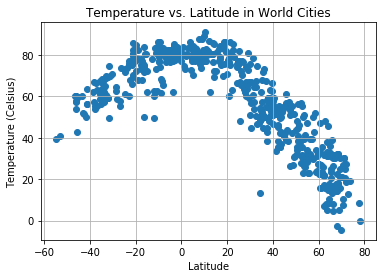

In [8]:
# Scatter Plots 
plt.scatter(city_df["lat"], city_df["temp"], marker="o")

# Incorporate the other graph properties
plt.title('Temperature vs. Latitude in World Cities')
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1: Lat vs. Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

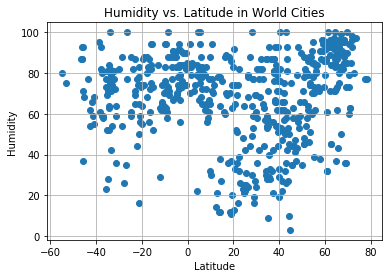

In [9]:
plt.scatter(city_df["lat"], city_df["hum"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs. Latitude in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2: Lat vs. Hum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

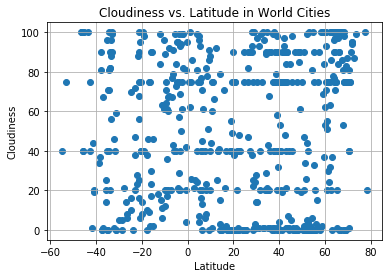

In [10]:
plt.scatter(city_df["lat"], city_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs. Latitude in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3: Lat vs. Clouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

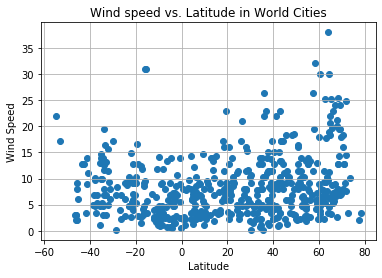

In [11]:
plt.scatter(city_df["lat"], city_df["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Wind speed vs. Latitude in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4: Lat vs. Wind.png")

# Show plot
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression (x_axis, y_axis, title, xlabel, ylabel):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.tight_layout()
    plt.show()
    
    print(f"The r-squared is: {rvalue**2}")

    return 

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[city_df["lat"] >=0]
north_df

city country                date    lat     lon   temp  hum  \
0       oistins      BB 2020-04-05 23:25:00  13.07  -59.53  80.60   78   
2    sovetskaya      RU 2020-04-05 23:25:00  44.78   41.17  41.00    3   
3          hofn      IS 2020-04-05 23:25:00  64.25  -15.21  45.63   87   
4    porto novo      BJ 2020-04-05 23:25:00   6.50    2.60  82.60   80   
6     wanlaweyn      SO 2020-04-05 23:25:00   2.62   44.89  80.22   71   
..          ...     ...                 ...    ...     ...    ...  ...   
533      muisne      EC 2020-04-05 23:25:29   0.60  -80.03  80.60   83   
534       dumas      US 2020-04-05 23:25:29  35.87 -101.97  71.71   33   
537        hami      CN 2020-04-05 23:25:29  42.80   93.45  52.57   26   
538     ternate      ID 2020-04-05 23:25:29   0.80  127.40  83.75   70   
539       along      IN 2020-04-05 23:25:29  28.17   94.77  60.12   49   

     clouds   wind  
0        40  13.87  
2        84  11.01  
3       100  18.99  
4        61   8.55  
6        21   8.16  
..      ...    ...  
533      75   8.05  
534       1  21.92  
537      84   1.10  
538      62   2.33  
539      93   4.70  

[374 rows x 9 columns]

In [14]:
south_df = city_df.loc[city_df["lat"] <=0]
south_df

city country                date    lat     lon   temp  hum  \
1    saint-philippe      RE 2020-04-05 23:25:00 -21.36   55.77  69.48   78   
5           rikitea      PF 2020-04-05 23:25:00 -23.12 -134.97  75.34   65   
8           mataura      NZ 2020-04-05 23:25:01 -46.19  168.86  60.01   87   
11          ushuaia      AR 2020-04-05 23:20:12 -54.80  -68.30  39.20   80   
16        mahebourg      MU 2020-04-05 23:25:01 -20.41   57.70  78.08   74   
..              ...     ...                 ...    ...     ...    ...  ...   
522        chinsali      ZM 2020-04-05 23:25:28 -10.54   32.08  62.67   64   
526         chimore      BO 2020-04-05 23:25:29 -16.98  -65.13  75.49   87   
528        ampanihy      MG 2020-04-05 23:25:29 -24.70   44.75  73.13   59   
535       ankazoabo      MG 2020-04-05 23:25:29 -22.28   44.52  67.93   77   
536      wellington      NZ 2020-04-05 23:24:46 -41.29  174.78  63.28   59   

     clouds   wind  
1        16   5.82  
5        47  10.38  
8       100   3.00  
11       40  21.92  
16       40   9.17  
..      ...    ...  
522      61   2.82  
526      75   2.93  
528      70   6.15  
535      23   2.71  
536      44  13.87  

[166 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

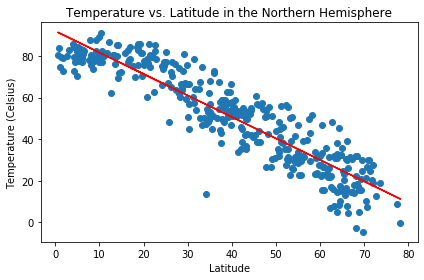

The r-squared is: 0.8416431055078494


In [15]:
regression(north_df["lat"], north_df["temp"],"Temperature vs. Latitude in the Northern Hemisphere","Latitude","Temperature (Celsius)")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

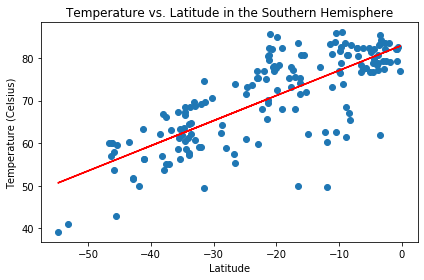

The r-squared is: 0.5854454571379079


In [16]:
regression(south_df["lat"], south_df["temp"],"Temperature vs. Latitude in the Southern Hemisphere","Latitude","Temperature (Celsius)")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

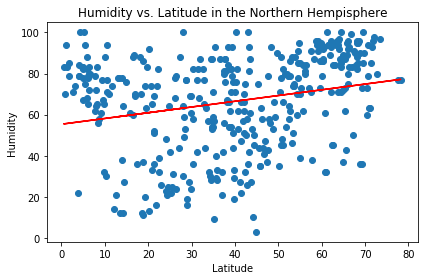

The r-squared is: 0.059964126332257006


In [17]:
regression(north_df["lat"], north_df["hum"],"Humidity vs. Latitude in the Northern Hempisphere", "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

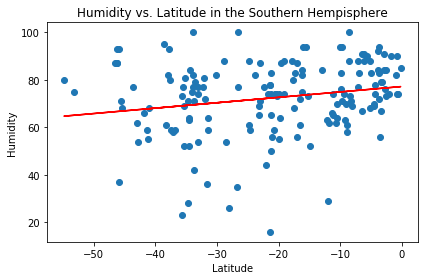

The r-squared is: 0.041318204376839744


In [18]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

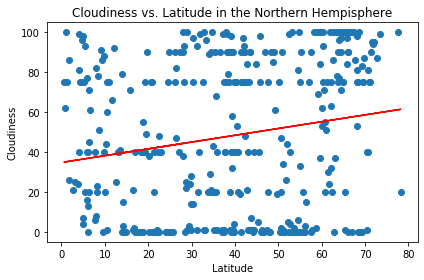

The r-squared is: 0.03422132993503855


In [19]:
regression(north_df["lat"], north_df["clouds"],"Cloudiness vs. Latitude in the Northern Hempisphere", "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

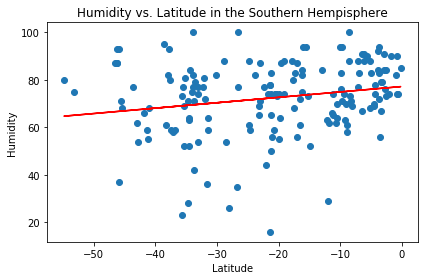

The r-squared is: 0.041318204376839744


In [20]:
regression(south_df["lat"], south_df["hum"],"Humidity vs. Latitude in the Southern Hempisphere", "Latitude", "Humidity")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

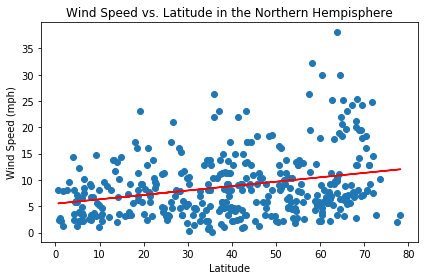

The r-squared is: 0.07897005583901093


In [21]:
regression(north_df["lat"], north_df["wind"],"Wind Speed vs. Latitude in the Northern Hempisphere", "Latitude", "Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

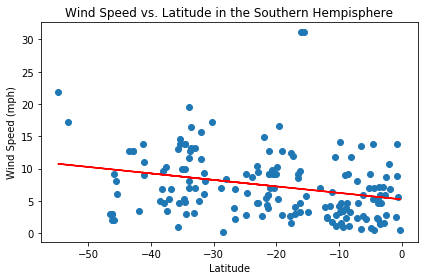

The r-squared is: 0.07308094286371655


In [22]:
regression(south_df["lat"], south_df["wind"],"Wind Speed vs. Latitude in the Southern Hempisphere", "Latitude", "Wind Speed (mph)")